### Student Information
Name:  李博業

Student ID: 410978058

GitHub ID: BORYA-dev

Kaggle name:

Kaggle private scoreboard snapshot:

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

- emotion
  - The emotion(answer) of data
    - sadness
    - disgust
    - anticipation
    - joy
    - trust
    - anger
    - fear
    - surprise

- data_identification :
  - identify the id is train or test
  
- tweets_DM.json : Main Data
  - type : list
  - length = 1867535
  - record :
    {
    '_score': 391,
    '_index': 'hashtag_tweets',
    '_source': {'tweet': {'hashtags': ['Snapchat'],
      'tweet_id': '0x376b20',
      'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
    '_crawldate': '2015-05-23 11:42:47',
    '_type': 'tweets'
    }

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [1]:
### Begin Assignment Here

import json

file_path = '/content/drive/MyDrive/Data_Lab2_HW/tweets_DM.json'

data = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line_number, line in enumerate(file, start=1):
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error in line {line_number}: {e}")

In [2]:
import pandas as pd

emotion_data = pd.read_csv('/content/drive/MyDrive/Data_Lab2_HW/emotion.csv')
data_id = pd.read_csv('/content/drive/MyDrive/Data_Lab2_HW/data_identification.csv')

In [4]:
print("emotion_data")
print(emotion_data.head(5))
print("data_id")
print(data_id.head(5))

emotion_data
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation
data_id
   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train


In [3]:
# 生成DataFrame
temp = []
for sub_d in data:
  temp.append(sub_d['_source']['tweet'])
data_df = pd.DataFrame(temp)
data_df.head(4)

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>


In [4]:
# 排序才能left join
data_df.sort_values("tweet_id",ignore_index = True, inplace = True)
emotion_data.sort_values("tweet_id",ignore_index = True, inplace = True)
data_id.sort_values("tweet_id",ignore_index = True, inplace = True)

print("sorted_raw_data")
print(data_df.head(4))
print("sorted_emotion")
print(emotion_data.head(4))
print("sorted_data_id")
print(data_id.head(4))

sorted_raw_data
                                            hashtags  tweet_id  \
0                                                 []  0x1c7f0f   
1                                      [BlackMirror]  0x1c7f10   
2  [twitch, Destinybeta, Destiny, Destiny2, Desti...  0x1c7f11   
3                                                 []  0x1c7f12   

                                                text  
0  @JZED74 While inappropriate AF, he likely wasn...  
1   o m g Shut Up And Dance though #BlackMirror <LH>  
2  On #twitch <LH> on the #Destinybeta #Destiny #...  
3  I tried to figure out why you mean so much to ...  
sorted_emotion
   tweet_id       emotion
0  0x1c7f10           joy
1  0x1c7f11  anticipation
2  0x1c7f14           joy
3  0x1c7f15           joy
sorted_data_id
   tweet_id identification
0  0x1c7f0f           test
1  0x1c7f10          train
2  0x1c7f11          train
3  0x1c7f12           test


In [5]:
# left_join raw data and emotion_data
data_df = pd.merge(left=data_df, right=emotion_data, how="left", on ="tweet_id")
data_df = pd.merge(left=data_df, right=data_id, how="left", on ="tweet_id")

In [58]:
data_df.head(5)

,hashtags,tweet_id,text,emotion,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test


In [9]:
data_df.isna().sum()

,0
hashtags,0
tweet_id,0
text,0
emotion,411972
identification,0


In [6]:
training_data = data_df.query("identification == 'train'").reset_index(drop =True)
testing_data = data_df.query("identification == 'test'").reset_index(drop =True)

In [7]:
del data_df
del emotion_data
del data_id

#### Data Quality checking
- Missing Value


In [89]:
# Missing value checking
training_data.isna().sum(axis=0)

,0
hashtags,0
tweet_id,0
text,0
emotion,0
identification,0


In [8]:
import matplotlib.pyplot as plt
import numpy as np

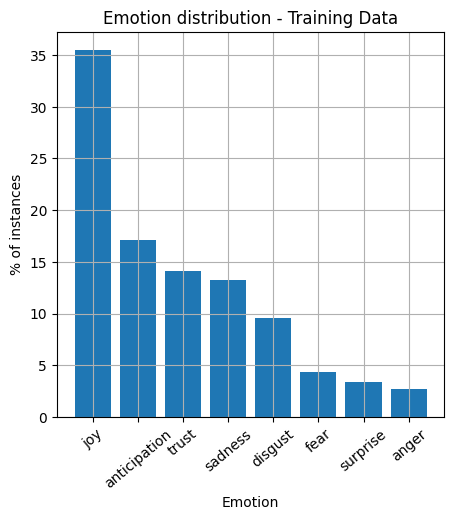

In [14]:
plt.figure( figsize = [5,5] )

temp_value = training_data.emotion.value_counts().values
plt.bar(training_data.emotion.value_counts().index, temp_value*100/(temp_value.sum()))

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.xticks(rotation = 40)
plt.title('Emotion distribution - Training Data')
plt.grid(True)

In [9]:
train_data_sample = training_data.sample(frac=0.3, random_state=42)
train_data_sample = train_data_sample.reset_index(drop=True)
x_train = train_data_sample.drop(columns = ["emotion", "identification"])
y_train = train_data_sample.emotion
# x_test = testing_data.drop(columns = ["emotion", "identification"])

In [17]:
# Undersampling to training data
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=25) # 42
# X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Strafied sampling
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [12]:
del training_data
# del testing_data
# del x_train
# del y_train

In [13]:
x_train.reset_index(drop=True, inplace = True)
y_train.reset_index(drop=True, inplace = True)

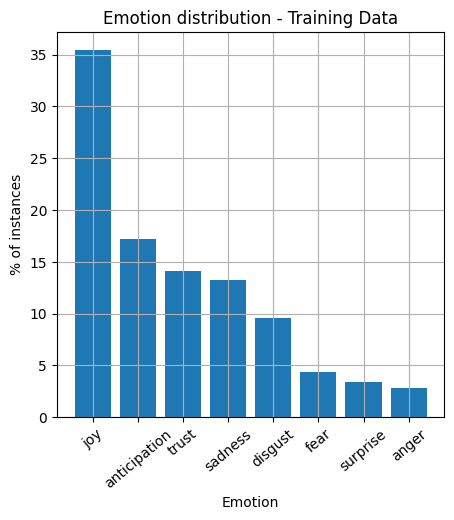

In [26]:
plt.figure( figsize = [5,5] )

temp_value = y_train.value_counts().values
plt.bar(y_train.value_counts().index, temp_value*100/(temp_value.sum()))

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.xticks(rotation = 40)
plt.title('Emotion distribution - Training Data')
plt.grid(True)

In [ ]:
# print("shape of Train_X")
# print(X_resampled.shape)
# print("shape of Train_y")
# print(y_resampled.shape)
# print("Count of each category")
# print(y_resampled.value_counts())

shape of Train_X
(318936, 5)
shape of Train_y
(318936,)
Count of each category
emotion
anger           39867
anticipation    39867
disgust         39867
fear            39867
joy             39867
sadness         39867
surprise        39867
trust           39867
Name: count, dtype: int64


#### Text Preprocessing to training and testing data

In [29]:
# pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 22.3 MB/s eta 0:00:00


In [14]:
import nltk
import re
import stringprep
nltk.download('punkt_tab')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
emoji_dict = {
    '😂': '[joy]',
    '❤️': '[love]',
    '😍': '[adoration]',
    '😭': '[cry]',
    '❤': '[care]',
    '😊': '[happy]',
    '🙏': '[pray]',
    '😘': '[kiss]',
    '💕': '[love_each_other]',
    '🔥': '[fire]',
    '😩': '[weary]',
    '🤔': '[think]',
    '💯': '[perfect]',
    '💙': '[loyalty]',
    '🙄': '[annoyed]',
    '😁': '[happy]',
    '🙌': '[celebrate]',
    '🙏🏾': '[pray]',
    '👍': '[approve]',
    '🙏🏽': '[pray]',
    '♡':'[love]',
    '🕘':'[time]',
    '🙋':'[hi]'
}

In [16]:
# Pre_processing

def cleaning(text):
    text = re.sub(r'[@#$%^&*()_+{}[\]:;"\'<>,.~\\/\-|=]', '', text)

    # remove some common words
    text = re.sub(r'\b(?:and|is|in|the|on|of|to|for)\b', '', text, flags=re.IGNORECASE)
    # remove numbers
    text = re.sub(r'\b\d+\b', '', text)
    # remove blank space
    text = re.sub(r'\s+', ' ', text).strip() # \s+ 一個或多個空白字符
    # remove links
    text = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
    return text


# emoji
def trans_emoji(text):
  for key, value in emoji_dict.items():
    text = text.replace(key, value)
  return text

# Stemming
st = nltk.PorterStemmer()

def stemming_on_text(data):
    '''
    input should be tokenized words : list
    '''
    text = [st.stem(word) for word in data]
    return text

# # Lemmatization
# lm = nltk.WordNetLemmatizer()
# def lemmatizer_on_text(data):
#     text = [lm.lemmatize(word) for word in data]
#     return text


def pre_processing(data, istokenized):

  '''
  data:DataFrame with text
  '''

  dataset = data['text']

  # 轉小寫
  dataset = dataset.apply(lambda text: text.lower().strip())

  # 移除 removing
  dataset = dataset.apply(lambda x: x.replace("<lh>",""))
  dataset = dataset.apply(lambda x: x.replace("<LH>",""))
  dataset = dataset.apply(lambda x: x.replace("#",""))

  # change emoji
  dataset = dataset.apply(lambda x: trans_emoji(x) )

  # cleaning some words
  dataset = dataset.apply(lambda x: cleaning(x) )


  dataset = dataset.apply(lambda x: x.replace("#",""))



  if istokenized:

    # Tokenized + Stemming
    tok = nltk.tokenize.TweetTokenizer()
    tt = dataset.apply(lambda x: stemming_on_text( tok.tokenize(x)) )
    tt.name = "tokenized"

    tt_combined = tt.apply(lambda x: cleaning( " ".join(x).strip())) # strip 移除空白字元
    tt_combined.name = "preprocess_text"

    pre_df = pd.DataFrame(tt_combined)

    return pre_df
  else:
    rr = pd.DataFrame(dataset)
    return rr.rename(columns = {"text":"preprocess_text"})

In [17]:
# 回傳前處理完成的text
pre_df_train = pre_processing(x_train, True)
pre_df_test = pre_processing(x_test, True)
pre_df_true_test = pre_processing(testing_data, True)

In [98]:
pre_df_train

,preprocess_text
0,shashatheitch can you believ thi shit ! ! ? go...
1,dearauntcrabbi they are furthest thing from co...
2,doe anyon els thing copi past thing bitmoji ke...
3,new sister airfranc young dynam weflyjoon
4,when your struggl write a paper but a comment ...
...,...
349330,it would not have been as bad if it didnt frea...
349331,im pleas world give me hope ! ! ! im a hope gi...
349332,i watch old steven seagal film … — watch half ...
349333,julianroepck loogunda who loogunda whi am i bl...


In [18]:
x_train = pd.concat([x_train, pre_df_train], axis=1)
x_train.reset_index(drop=True, inplace=True)
x_train = x_train.loc[:,"preprocess_text"]
x_train.head(3)

,preprocess_text
0,shashatheitch can you believ thi shit ! ! ? go...
1,dearauntcrabbi they are furthest thing from co...
2,doe anyon els thing copi past thing bitmoji ke...


In [81]:
x_train

NameError: name 'x_train' is not defined

In [19]:
x_test = pd.concat([x_test, pre_df_test], axis=1)
x_test.reset_index(drop=True, inplace=True)
x_test = x_test.loc[:,"preprocess_text"]
x_test.head(3)

,preprocess_text
0,ulisodop quick updat i get my brace off next m...
1,if you are femal over dm a great futur septemb...
2,no soft zone but today wa no reason i just wan...


In [20]:
testing_data = pd.concat([testing_data, pre_df_true_test], axis=1)
testing_data.reset_index(drop=True, inplace=True)
testing_data = testing_data.loc[:,["tweet_id","preprocess_text"] ]
testing_data.head(3)

,tweet_id,preprocess_text
0,0x1c7f0f,jzed while inappropri af he like wasnt kid
1,0x1c7f12,i tri figur out whi you mean so much me i coul...
2,0x1c7f13,onli “ big plan ” you ever had your life wa pr...


In [21]:
del pre_df_train
del pre_df_test
del pre_df_true_test

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tweet_tokenizer = nltk.tokenize.TweetTokenizer()
TF_IDF_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.9, tokenizer = tweet_tokenizer.tokenize )
output_vectorizer = TF_IDF_vectorizer.fit_transform(x_train.values)  # fit + transform

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
TF_IDF_vectorizer.get_feature_names_out()[:100]

array([' 🏻', ' 🏼', ' 🏽', ' 🏾', ' 🏿', '!', '1st', '2nd', '3rd', '4th', '?',
       'a', 'abc', 'abil', 'abl', 'about', 'abov', 'absolut', 'abus',
       'accept', 'accomplish', 'accord', 'account', 'achiev', 'across',
       'act', 'action', 'activ', 'actor', 'actual', 'ad', 'add', 'addict',
       'admit', 'ador', 'adorationador', 'adorationadorationador',
       'adult', 'adventur', 'advic', 'af', 'affect', 'afraid', 'after',
       'afternoon', 'again', 'against', 'age', 'ago', 'agre', 'ah',
       'ahead', 'aint', 'air', 'alabama', 'album', 'aliv', 'all', 'allah',
       'allow', 'almost', 'alon', 'along', 'alreadi', 'alright', 'also',
       'alway', 'am', 'amaz', 'amazon', 'amen', 'america', 'american',
       'among', 'amount', 'an', 'angel', 'anger', 'angri', 'ani', 'anim',
       'anniversari', 'announc', 'annoy', 'anoth', 'answer', 'anxieti',
       'anybodi', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'apolog',
       'app', 'appar', 'appear', 'appl', 'appli', 'appreci'],

In [25]:
output_vectorizer_test = TF_IDF_vectorizer.transform(x_test.values)  # only transform

In [113]:
testing_data.preprocess_text.values

array(['jzed while inappropri af he like wasnt kid',
       'i tri figur out whi you mean so much me i couldnt think a singl reason becaus there are just too mani …',
       'onli “ big plan ” you ever had your life wa promot yourself turnbullmalcolm auspol fizza',
       ...,
       'asian dude with dangli gold ear back he up hi game w fur coat artworld sothebi',
       'i think kostakoufo might be worst player nba right nowgosh nba cantmakeaj',
       'i told myself id be twitter famou twitter machin'], dtype=object)

In [26]:
output_vectorizer_true_test = TF_IDF_vectorizer.transform(testing_data.preprocess_text.values)  # only transform

In [1]:
import pickle

In [28]:
# 寫出

# 訓練+測試
with open('/content/drive/MyDrive/Data_Lab2_HW/tf-idf-trained.pkl', 'wb') as file:  # 'wb' 表示以二進位寫入模式
    pickle.dump([TF_IDF_vectorizer, output_vectorizer, y_train, output_vectorizer_test, y_test], file)

# 真正測試資料
with open('/content/drive/MyDrive/Data_Lab2_HW/testing_data.pkl', 'wb') as file:  # 'wb' 表示以二進位寫入模式
    pickle.dump([testing_data, output_vectorizer_true_test], file)


In [5]:
#讀入

with open('/content/drive/MyDrive/Data_Lab2_HW/tf-idf-trained.pkl', 'rb') as file:  # 'rb' 表示以二進位讀取模式
    tfidf_list = pickle.load(file)

with open('/content/drive/MyDrive/Data_Lab2_HW/testing_data.pkl', 'rb') as file:  # 'rb' 表示以二進位讀取模式
    testing_list = pickle.load(file)

In [118]:
len(testing_list)

2

In [120]:
testing_list[1]

<411972x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 4734493 stored elements in Compressed Sparse Row format>

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
X = tfidf_list[1].toarray()
y_train = tfidf_list[2].values

In [8]:
y_train.shape

(349335,)

In [8]:
del tfidf_list
del testing_list

In [ ]:
model = RandomForestClassifier()

## training!
DT_model = model.fit(X, y_train)

## predict! training

In [ ]:
y_train_pred = DT_model.predict(X)

In [7]:
## Training Accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.97


In [36]:
with open('/content/drive/MyDrive/Data_Lab2_HW/random_forest.pkl', 'rb') as file:  # 'wb' 表示以二進位寫入模式
     DT_model = pickle.load(file)

In [9]:
X = loaded_data[2].toarray()

In [12]:
# Mini-Testing
# output_vectorizer_testing = TF_IDF_vectorizer.fit_transform(mini_X_test['preprocess_text'])

# Predict Mini-Testing (by Random Forest)
y_test_result = DT_model.predict(X)

acc_train = accuracy_score(y_true=loaded_data[3], y_pred=y_test_result)

print('Mini-testing accuracy: {}'.format(round(acc_train, 2)))

Mini-testing accuracy: 0.27


In [37]:
pre_df_test = pre_processing(testing_data, True)

In [38]:
testing_data = pd.concat([testing_data, pre_df_test], axis=1)
testing_data.reset_index(drop=True, inplace=True)
testing_data.head(3)

,hashtags,tweet_id,text,emotion,identification,pre_process_text
0,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...",NaN,test,JZED74 While inappropriate AF he likely wasnt ...
1,[],0x1c7f12,I tried to figure out why you mean so much to ...,NaN,test,I tried figure out why you mean so much me I c...
2,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,...",NaN,test,only “big plan” you ever had your life was pro...


In [39]:
testing_data = testing_data.loc[:,["tweet_id","pre_process_text"]]
testing_data

,tweet_id,pre_process_text
0,0x1c7f0f,JZED74 While inappropriate AF he likely wasnt ...
1,0x1c7f12,I tried figure out why you mean so much me I c...
2,0x1c7f13,only “big plan” you ever had your life was pro...
3,0x1c7f17,Looking back situations old new recent or what...
4,0x1c7f18,jasoninthehouse Why do you insist talking abou...
...,...,...
411967,0x38fe04,Grand Bargain Great American Betrayal realDona...
411968,0x38fe06,I get be a year old girls new mama starting to...
411969,0x38fe13,Asian dude with dangly gold earrings back hes ...
411970,0x38fe14,I think kostakoufos might be worst player NBA ...


In [40]:
#把做完前處理的資料輸出
# with open('/content/drive/MyDrive/testing_data_preprocessing.pkl', 'wb') as file:  # 'wb' 表示以二進位寫入模式
#     pickle.dump(testing_data, file)

In [1]:
import pickle

with open('/content/drive/MyDrive/testing_data_preprocessing.pkl', 'rb') as file:  # 'wb' 表示以二進位寫入模式
     testing_data = pickle.load(file)


with open('/content/drive/MyDrive/Data_Lab2_HW/random_forest.pkl', 'rb') as file:  # 'wb' 表示以二進位寫入模式
     DT_model = pickle.load(file)

with open('/content/drive/MyDrive/Data_Lab2_HW/tf-idf-trained.pkl', 'rb') as file:  # 'rb' 表示以二進位讀取模式
    TF_IDF_vectorizer = pickle.load(file)

TF_IDF_vectorizer = TF_IDF_vectorizer[4]

In [2]:
# 真正的Testing
output_vectorizer_real_testing = TF_IDF_vectorizer.transform(testing_data["pre_process_text"].values)

In [ ]:
output_vectorizer_real_testing.toarray()

In [ ]:
y_test_result = DT_model.predict(output_vectorizer_real_testing.toarray())

In [ ]:
result = pd.DataFrame( {
   "id" : testing_data.tweet_id,
   "emotion" : y_test_result
} )
result.to_csv("/content/drive/MyDrive/submission_test_v4.csv", index_col=0)
result.head(5)

In [ ]:
# BERT Sentence Embedding
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentence_embeddings = model.encode(list(pre_df.pre_process_text))

In [ ]:
import umap

In [ ]:
# Dimension Reduction
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

I don't know, he's all  <LH> #starkwaking
🕘 05:00 15 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,11 🇨🇦CAD = 7,41 🇬🇧GBP = 12,21 🇨🇳CNY = 1,41 🇷🇺RUB = 0,16 
compostible bin bags keep splitting <LH> and I can’t have a garden waste bin where I live  from @maidstonebc #solutionneeded
@burbage_hope Someone needs to realize I've had enough of this, I'm done with the chances. <LH>  #justsaying
Just caught up with Bake Off now it can Fuck Off!!! So annoyed! Sod Mary, Mel and Sue! It's all about @LiamcBakes <LH>  😠 #GBBO
an ignorant show @TheRealDaytime just got more ignorant. talking about  as a COUNTRY in 2017. wow. <LH> <LH> #Africa
Millions of purple freshwater balderdash ! <LH> 
karen from UberEats.  you have ruined my night. <LH> 
I pre-ordered Reputation in AUGUST and I'm not even gonna get it until next Friday. <LH> 
NB 57 is a parking lot north of Herrin IL exit. Demand post-eclipse way exceeding supply. .  #frustrated #traffic


In [ ]:
X_resampled.text[:10]

,text
0,"I don't know, he's all #starkwaking <LH>"
1,"🕘 05:00 15 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,11..."
2,compostible bin bags keep splitting <LH> and I...
3,@burbage_hope Someone needs to realize I've ha...
4,Just caught up with Bake Off now it can Fuck O...
5,an ignorant show @TheRealDaytime just got more...
6,Millions of purple freshwater balderdash ! <LH>
7,karen from UberEats. you have ruined my night...
8,I pre-ordered Reputation in AUGUST and I'm not...
9,NB 57 is a parking lot north of Herrin IL exit...


In [ ]:
pre_df = pre_processing(X_resampled) # 回傳前處理完成的text

KeyboardInterrupt: 

In [ ]:
X_resampled = pd.concat([X_resampled, pre_df], axis=1)
X_resampled.head(3)

,hashtags,tweet_id,text,tokenized,preprocess_text
0,[starkwaking],0x1c7f31,"I don't know, he's all #starkwaking <LH>","[i, do, n't, know, ,, he, 's, all, starkwak]","i do n't know , he 's all starkwak"
1,[],0x1c7f3a,"🕘 05:00 15 Aug <LH> 🇺🇸USD = 9,43 🇪🇺EUR = 11,11...","[🕘, :, aug, 🇺🇸usd, ,, 🇪🇺eur, ,, 🇨🇦cad, ,, 🇬🇧gb...","🕘 : aug 🇺🇸usd , 🇪🇺eur , 🇨🇦cad , 🇬🇧gbp , 🇨🇳cni ..."
2,[solutionneeded],0x1c7f50,compostible bin bags keep splitting <LH> and I...,"[compost, bin, bag, keep, split, and, i, can, ...",compost bin bag keep split and i can ’ t have ...


In [ ]:
X_resampled.isna().sum()

,0
hashtags,0
tweet_id,0
text,0
tokenized,0
preprocess_text,0


In [ ]:
# Testing Precessing

pre_df_test = pre_processing(x_test)

x_test = pd.concat([x_test, pre_df_test], axis=1)
x_test.head(3)

,hashtags,tweet_id,text,tokenized,preprocess_text
0,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...","[while, inappropri, af, ,, he, like, wa, n't, ...","while inappropri af , he like wa n't kid ."
1,[],0x1c7f12,I tried to figure out why you mean so much to ...,"[i, tri, to, figur, out, whi, you, mean, so, m...",i tri to figur out whi you mean so much to me ...
2,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,...","[the, onli, “, big, plan, ”, you, ever, had, i...",the onli “ big plan ” you ever had in your lif...


- Embedding
  - TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TF-IDF 和作業一樣
# Answer here
TF_IDF_vectorizer =  TfidfVectorizer(max_features=500, tokenizer = nltk.word_tokenize, max_df=0.9)
output_vectorizer = TF_IDF_vectorizer.fit_transform(X_resampled['preprocess_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
TF_IDF_vectorizer.get_feature_names_out()

array(['!', '$', '%', '&', "'", "'d", "'ll", "'m", "'re", "'s", "'ve",
       '(', ')', '*', ',', '-', '.', '..', '...', '....', '/', ':', ';',
       '?', '``', 'a', 'abl', 'about', 'absolut', 'account', 'act',
       'actual', 'after', 'again', 'against', 'ago', 'all', 'almost',
       'alreadi', 'also', 'alway', 'am', 'amaz', 'american', 'an', 'and',
       'ani', 'anoth', 'answer', 'anyon', 'anyth', 'are', 'around', 'as',
       'ask', 'at', 'away', 'awesom', 'babi', 'back', 'bad', 'be',
       'beauti', 'becaus', 'becom', 'bed', 'been', 'befor', 'believ',
       'best', 'better', 'big', 'birthday', 'black', 'bless', 'book',
       'both', 'bought', 'boy', 'break', 'bring', 'brother', 'busi',
       'but', 'buy', 'by', 'ca', 'call', 'came', 'can', 'car', 'care',
       'caus', 'chang', 'check', 'child', 'christma', 'class', 'close',
       'come', 'complet', 'could', 'countri', 'crazi', 'cri', 'custom',
       'd', 'dad', 'damn', 'day', 'did', 'die', 'differ', 'do', 'doe',
       '

- Model
  - Random Forest

In [ ]:
result = pd.DataFrame( {
   "id" : x_test.tweet_id,
   "emotion" : y_test_result
} )
result.to_csv("/content/drive/MyDrive/submission_test_v3.csv")
result.head(5)

,id,emotion
0,0x1c7f0f,trust
1,0x1c7f12,sadness
2,0x1c7f13,anger
3,0x1c7f17,surprise
4,0x1c7f18,anger


In [ ]:
x_test

,hashtags,tweet_id,text,tokenized,preprocess_text
0,[],0x1c7f0f,"@JZED74 While inappropriate AF, he likely wasn...","[while, inappropriate, af, ,, he, likely, was,...","while inappropriate af , he likely was n't kid..."
1,[],0x1c7f12,I tried to figure out why you mean so much to ...,"[i, tried, to, figure, out, why, you, mean, so...",i tried to figure out why you mean so much to ...
2,"[auspol, fizza]",0x1c7f13,"The only “big plan” you ever had in your life,...","[the, only, “, big, plan, ”, you, ever, had, i...",the only “ big plan ” you ever had in your lif...
3,[],0x1c7f17,"Looking back on situations old & new, recent o...","[looking, back, on, situations, old, new, ,, r...","looking back on situations old new , recent or..."
4,[],0x1c7f18,@jasoninthehouse Why do you insist on talking ...,"[why, do, you, insist, on, talking, about, the...",why do you insist on talking about the clinton...
...,...,...,...,...,...
411967,"[traitor, treason]",0x38fe04,"""The Grand Bargain"" The Great American Betraya...","[``, the, grand, bargain, '', the, great, amer...",`` the grand bargain '' the great american bet...
411968,"[FosterCare, roadtoadoption, Adoption]",0x38fe06,I get to be a 1 year old girl's new mama start...,"[i, get, to, be, a, year, old, girl, 's, new, ...",i get to be a year old girl 's new mama starti...
411969,[artworld],0x38fe13,Asian dude with dangly gold earrings is back &...,"[asian, dude, with, dangly, gold, earrings, is...",asian dude with dangly gold earrings is back h...
411970,"[nba, cantmakeaJ]",0x38fe14,I think @kostakoufos might be the worst player...,"[i, think, might, be, the, worst, player, in, ...",i think might be the worst player in the right...


In [ ]:
# Word2Vec
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [ ]:
# training model

from gensim.models import Word2Vec

## setting
vector_dim = 100  # How many nodes
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=X_resampled.tokenized.values,
                  vector_size=vector_dim, window=window_size,
                  min_count=min_count, epochs=training_epochs)


In [ ]:
# 存Word2Vec Model
# import pickle

# with open('/content/drive/MyDrive/Data_Lab2_HW/Word2Vec_model.pkl', 'wb') as file:  # 使用二進制模式
#     pickle.dump(word2vec_model, file)

In [ ]:
# 讀Word2Vec Model
import pickle
with open('/content/drive/MyDrive/Data_Lab2_HW/Word2Vec_model.pkl', 'rb') as file:  # 使用二進制模式
    word2vec_model = pickle.load(file)

In [ ]:
sentence_num = 0

tokenized_sentence = train_df.loc[sentence_num,'text_tokenized']
length_sentence = len(tokenized_sentence)

result = np.zeros(100)

for i in tokenized_sentence:
    result += word2vec_model.wv[i]

avg_result =  result/length_sentence
avg_result

In [ ]:
# BOW-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
TF_IDF_vectorizer =  TfidfVectorizer(max_features=1000)
output_vectorizer = TF_IDF_vectorizer.fit_transform(X_resampled.loc[:,"preprocess_text"])

## check dimension
output_vectorizer.shape

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
TF_IDF_vectorizer.fit_transform(X_resampled.loc[:2,'preprocess_text'])

<3x21 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
train_TFIDF = pd.DataFrame(output_vectorizer.toarray(), columns = TF_IDF_vectorizer.get_feature_names_out())
train_TFIDF.head(5)

,!,#,$,%,&,','','d,'ll,'m,...,😨,😩,😭,😯,😰,😱,😳,🙄,🙏,🤔
0,0.00000,0.153315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.106365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.086297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.54132,0.068355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# TF-IDF Testing
output_vectorizer_testing = TF_IDF_vectorizer.fit_transform(testing_data['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


- Evaluation Training Prediction

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_resampled, y_pred=y_train_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.99


In [ ]:
# Testing result
DT_model.predict(output_vectorizer)

In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [ ]:
# Predict Testing (by Random Forest)
y_test_result = DT_model.predict(output_vectorizer_testing)
y_test_result[:10]

array(['sadness', 'anger', 'fear', 'anticipation', 'fear', 'fear',
       'sadness', 'anticipation', 'fear', 'anticipation'], dtype=object)

In [ ]:
testing_data.tweet_id

,tweet_id
0,0x1c7f0f
1,0x1c7f12
2,0x1c7f13
3,0x1c7f17
4,0x1c7f18
...,...
411967,0x38fe04
411968,0x38fe06
411969,0x38fe13
411970,0x38fe14


In [ ]:
result = pd.DataFrame( {
   "id" : testing_data.tweet_id,
   "emotion" : y_test_result
} )
result.to_csv("/content/drive/MyDrive/submission_test.csv")
result.head(5)

,id,emotion
0,0x1c7f0f,sadness
1,0x1c7f12,anger
2,0x1c7f13,fear
3,0x1c7f17,anticipation
4,0x1c7f18,fear


In [ ]:
# Bert Embedding

In [ ]:
terms_tf_idf = TF_IDF_vectorizer.get_feature_names_out()
terms_tf_idf[100:110]

array(['any', 'anymore', 'anyone', 'anything', 'app', 'apparently',
       'apple', 'are', 'around', 'as'], dtype=object)

In [ ]:
data_id.query("tweet_id == '0x2ff708'").identification

,identification
1275897,train


In [ ]:
# 紀錄測試集結果

 #Random seed 42
# 1. Non-Preprocessing + TF-IDF + Random_Forest : 0.10249
# 2. Preprocessing + TF-IDF + Random_Forest : 0.12396

 # Random seed 37
# 3. Preprocessing + TF-IDF(including ,max_df=0.9) + Random_Forest : 0.12396